Pathway identification workflow related to DataCure and AOPlink case studies

This notebook downloads TG-Gates data of 4 compounds and selects genes overexpressed in all sample. The Affymetrix probe sets are then translated into Ensembl gene identifiers using the BridgeDB service and pathways associated with the genes are identified using the WikiPathways service.


In [1]:
import requests
import pandas
import urllib

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, SVG, HTML
from SPARQLWrapper import SPARQLWrapper, JSON
from rdflib import Graph

explanation about the web addresses

In [2]:
chemidconvert = 'https://chemidconvert.cloud.douglasconnect.com/v1/'
tggatesconvert = 'http://open-tggates-api.cloud.douglasconnect.com/v2/'

explanation about getting images and names amino acids

In [2]:
compoundset = {'methapyrilene', 'phenylbutazone', 'simvastatin', 'valproic acid'}

explanation about the working code

In [4]:
# Make the table.
pandas.set_option('display.max_colwidth', -1)  # Make the table.
compounds = pandas.DataFrame(columns=['Compound name', 'Smiles', 'Image'])

# Fill "compounds" with the "smiles" by the compound name
for compound in compoundset:
    smiles = requests.get(chemidconvert + 'name/to/smiles', params={'name': compound}).json()['smiles']
    compounds = compounds.append({'Compound name': compound, 'Smiles': smiles, 'Image': smiles}, ignore_index=True)


def smiles_to_image_html(smiles):
    """Gets for each smile the image, in HTML.
    :param smiles: Takes the “smiles” form “compounds”.
    :return: The HTML code for the image of the given smiles.
    """
    return '<img style="width:150px" src="'+chemidconvert+'asSvg?smiles='+urllib.parse.quote(smiles)+'"/>'


# Return a HTML table of "compounds", after "compounds" is fill by "smiles_to_image_html"
HTML(compounds.to_html(escape=False, formatters=dict(Image=smiles_to_image_html)))

,Compound name,Smiles,Image
0,valproic acid,CCCC(CCC)C(O)=O,
1,simvastatin,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC[C@@H]3C[C@@H](O)CC(=O)O3)[C@@H]12,
2,methapyrilene,CN(C)CCN(Cc1sccc1)c2ccccn2,
3,phenylbutazone,CCCCC1C(=O)N(N(C1=O)c2ccccc2)c3ccccc3,


In [5]:
# Get the names from "compoundset" and put a “|” between them for the TGGATES.                                         
compounds_name = "|".join(compoundset)                                                                                 
print(compounds_name)                                                                                                  
                                                                                                                       
#  Gets more infomation from the TGGATES about the compounds by "compounds_name".                                      
r2 = requests.get(tggatesconvert + 'samples',                                                                                      
                  params={'limit': 10000, 'compoundNameFilter': compounds_name,                                        
                          'organismFilter': 'Human', 'tissueFilter': 'Liver',                                          
                          'cellTypeFilter': 'in vitro', 'repeatTypeFilter': 'Single',                                  
                          'timepointHrFilter': '24.0', 'doseLevelFilter': 'High'                                       
                          })       
                                                                                                                       
# The TGGATES Status code is printed and, verified if it is 200, and  thereafter transformt to a jason.                
print("TGGATES Status code: "+str(r2.status_code))                                                                     
samples = None                                                                                                         
if r2.status_code == 200:                                                                                              
    samples = r2.json()                                                                                                
    # Print the some information of the "samples" as a dataframe.                                                      
    print(pandas.DataFrame(samples['samples']))                                                                        
else:                                                                                                                  
    print("samples has not been created, because the TGGATES Status code was not 200. The code will now exit.")        
    exit(1)                                                                                                            

valproic acid|simvastatin|methapyrilene|phenylbutazone


TGGATES Status code: 200
           _id_  cellType    compoundName controlSamples doseLevel organism  \
0  003016020014  in vitro  methapyrilene   []             High      Human     
1  003016020015  in vitro  methapyrilene   []             High      Human     
2  003016014002  in vitro  phenylbutazone  []             High      Human     
3  003016014003  in vitro  phenylbutazone  []             High      Human     
4  003016079002  in vitro  simvastatin     []             High      Human     
5  003016079003  in vitro  simvastatin     []             High      Human     
6  003016038010  in vitro  valproic acid   []             High      Human     
7  003016038011  in vitro  valproic acid   []             High      Human     

  repeatType      sampleId  timepointHr tissue  
0  Single     003016020014  24.0         Liver  
1  Single     003016020015  24.0         Liver  
2  Single     003016014002  24.0         Liver  
3  Single     003016014003  24.0         Liver  
4  Single     0030

bar

In [6]:
# Again contact is maid with Tagates to get more information from the samples.
foldchanges = pandas.DataFrame
for sample in samples["samples"]:  # type: TODO:aanpasen
    sampleId = sample["sampleId"]
    sampleName = sample["compoundName"]+"\n"+sample["sampleId"]
    r3 = requests.get(tggatesconvert+'results',
                      params={'limit': 'none', 'sampleIdFilter': sampleId,
                              'valueTypeFilter': 'log2fold', 'pValueMax': '0.1'})

    df = None
    if r3.status_code == 200:
        data = r3.json()
        df = pandas.DataFrame(data['results'])
        df = df.filter(items=['assayId', 'value'])
        df.columns = ['ProbeSet', sampleName]
    else:
        print("samples has not been created, because the TGGATES Status code was not 200. The code will now exit.")
        exit(1)

    if foldchanges.empty:
        foldchanges = df
    else:
        foldchanges = pandas.merge(foldchanges, df, how='outer', on=['ProbeSet'])

In [7]:
high = True  # TODO: uitleg

# Compare the fold change of the "samples", and chose the highest.
for sample in samples["samples"]:
    high = high & (foldchanges[sample["compoundName"] + "\n" + sample["sampleId"]] >= 1)

foldchanges = foldchanges[high]

In [8]:

foldchanges

,ProbeSet,methapyrilene 003016020014,methapyrilene 003016020015,phenylbutazone 003016014002,phenylbutazone 003016014003,simvastatin 003016079002,simvastatin 003016079003,valproic acid 003016038010,valproic acid 003016038011
217,243015_at,3.550345,3.607312,5.363620,5.425791,2.572754,2.564547,3.676939,3.807503
1105,229477_at,2.330954,2.191222,3.304727,3.415220,4.319531,4.132099,4.195705,3.802112
1106,229476_s_at,2.633772,2.882779,3.941051,3.899513,4.813974,4.702100,4.504707,4.460230
1376,227909_at,1.707718,1.954088,1.283314,1.484967,1.384484,1.640825,2.397012,2.142758
5361,208928_at,1.113596,1.250744,1.776669,1.682174,1.458460,1.429573,1.624269,1.398186
5604,207275_s_at,1.071509,1.147782,1.492939,1.539038,1.506103,1.431030,1.911157,1.826470
5764,205999_x_at,2.640015,2.349996,5.827156,5.702978,4.350264,4.210010,4.211109,3.934326
5773,205939_at,3.221563,3.000548,5.963379,5.733314,4.347017,4.373431,3.426144,3.077940
6991,201627_s_at,2.507150,2.567229,2.178763,2.132357,2.298643,2.169345,1.799169,1.656467
6993,201625_s_at,2.420876,2.454265,2.004699,2.082050,2.157720,2.225040,1.357678,1.223833


explanation

In [9]:
%matplotlib inline

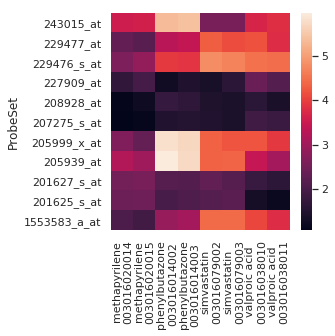

In [10]:
for_vis = foldchanges.set_index('ProbeSet')
plt.figure(figsize=(4, 4))
sns.set(font="Dejavu sans")
sns_plot = sns.heatmap(for_vis)  # type: object
sns_plot

Convertion of probe sets to Ensembl gene identifiers